In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
scratch_df = pd.read_csv('scratch_df.csv')


class_etape_df = pd.read_csv('class_etape_df.csv')


In [3]:
def race_dynamics_plot(scratch_df,race,year):
    
    filtered_df = scratch_df[scratch_df['Race'] == race & scratch_df['year'] == year]
    # Get unique values in the "Event" column
    unique_events = filtered_df['Event'].unique()

    # Create a line plot for each unique event
    for event in unique_events:
        event_df = filtered_df[filtered_df['Event'] == event]

        # Create a subplot for each row in event_df
        plt.figure(figsize=(18, 10))
        for index, row in event_df.iterrows():
            x_values = ['Gap to 1st CaP1 (s)', 'Gap to 1st Vélo Cum. (s)', 'Gap to 1st Total (s)']
            y_values = [row[x] for x in x_values]
            plt.plot(x_values, y_values, label=event_df["Rang"][index])

        # Customize the plot
        plt.title(f'Event: {event}')
        plt.xlabel('Gap Type')
        plt.ylabel('Gap (seconds)')
        plt.legend()

        # Show or save the plot as needed
        plt.show()

In [4]:
def create_dataframe_top30(scratch_df,Race):
    df = pd.DataFrame()
    years = [2023, 2022, 2021, 2020, 2019, 2018]
    for year_idx, year in enumerate(years):
        unique_event = scratch_df[(scratch_df['Race'] == Race) & (scratch_df['year'] == year)]["Event"].unique()
        for event_idx, event in enumerate(unique_event):
            data_subset = scratch_df[(scratch_df['Event'] == event) & (scratch_df['year'] == year) & (scratch_df['Race'] == Race)]
            df = pd.concat([df,data_subset[:30]])
    return df

In [5]:
scratch_df[(scratch_df['Race'] == "D1H") & (scratch_df['year'] == 2023)]["Event"].unique()

array(['parthenay', 'mont-saint-aignan', 'noyon', 'avallon'], dtype=object)

In [6]:
df_D1H = create_dataframe_top30(scratch_df,"D1H")


In [7]:
data_subset = scratch_df[(scratch_df['Event'] == "parthenay") & (scratch_df['year'] == 2023) & (scratch_df['Race'] == "D1H")]
data_subset[:30]

,Rang,Athlète,Club,Total,CaP1,#1,Vélo,Vélo Cum.,#2,CaP2,...,Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s/km),Score Total,Score CaP1,Score Vélo,Score Vélo Cum.,Score CaP2,year,T1,T2
478,1.0,ARNAUD DELY,E.S.M. GONFREVILLE L ORCHER,0 days 00:52:18,0 days 00:14:50,00:00:35,0 days 00:29:03,0 days 00:44:27,00:00:25,0 days 00:07:28,...,8.0,0.0,10000.000000,10000.000000,9661.503155,9970.003750,10000.000000,2023,NaN,NaN
479,2.0,EMILE BLONDEL HERMANT,TEAM NOYON TRIATHLON,0 days 00:52:23,0 days 00:14:51,00:00:38,0 days 00:28:56,0 days 00:44:24,00:00:21,0 days 00:07:39,...,5.0,4.4,9984.091632,9988.776655,9700.460829,9981.231231,9760.348584,2023,NaN,NaN
480,3.0,KRILAN LE BIHAN,U.S. PALAISEAU TRIATHLON,0 days 00:52:29,0 days 00:14:50,00:00:33,0 days 00:29:02,0 days 00:44:25,00:00:26,0 days 00:07:39,...,6.0,4.4,9965.068276,10000.000000,9667.049369,9977.485929,9760.348584,2023,NaN,NaN
481,4.0,MAXIME BONVALET,M.S.A. TRIATHLON,0 days 00:52:31,0 days 00:14:52,00:00:35,0 days 00:29:00,0 days 00:44:26,00:00:23,0 days 00:07:44,...,7.0,6.4,9958.743256,9977.578475,9678.160920,9973.743436,9655.172414,2023,NaN,NaN
482,5.0,ADRIEN PILLEUX,E.S.M. GONFREVILLE L ORCHER,0 days 00:52:32,0 days 00:14:54,00:00:32,0 days 00:28:57,0 days 00:44:23,00:00:27,0 days 00:07:43,...,4.0,6.0,9955.583756,9955.257271,9694.876223,9984.979347,9676.025918,2023,NaN,NaN
483,6.0,KILIAN CARPENTIER,LYS CALAIS TRIATHLON,0 days 00:52:34,0 days 00:15:18,00:00:35,0 days 00:28:28,0 days 00:44:19,00:00:22,0 days 00:07:53,...,0.0,10.0,9949.270767,9694.989107,9859.484778,10000.000000,9471.458774,2023,NaN,NaN
484,7.0,THOMAS LAURENT,EVREUX A.C. TRIATHLON,0 days 00:52:39,0 days 00:15:20,00:00:35,0 days 00:28:31,0 days 00:44:25,00:00:23,0 days 00:07:52,...,6.0,9.6,9933.523267,9673.913043,9842.197545,9977.485929,9491.525424,2023,NaN,NaN
485,8.0,MARTIN LAURENT,EVREUX A.C. TRIATHLON,0 days 00:52:39,0 days 00:15:11,00:00:38,0 days 00:28:33,0 days 00:44:21,00:00:22,0 days 00:07:57,...,2.0,11.6,9933.523267,9769.484083,9830.706363,9992.484029,9392.033543,2023,NaN,NaN
486,9.0,THOMAS GILLODTS,LES TRITONS MELDOIS,0 days 00:52:41,0 days 00:14:57,00:00:31,0 days 00:28:54,0 days 00:44:21,00:00:19,0 days 00:08:02,...,2.0,13.6,9927.238216,9921.962096,9711.649366,9992.484029,9294.605809,2023,NaN,NaN
487,10.0,LEO STARCK,LES TRITONS MELDOIS,0 days 00:52:45,0 days 00:14:52,00:00:32,0 days 00:29:03,0 days 00:44:26,00:00:23,0 days 00:07:57,...,7.0,11.6,9914.691943,9977.578475,9661.503155,9973.743436,9392.033543,2023,NaN,NaN


# 1.1 Visualization for each part of the race for every race category

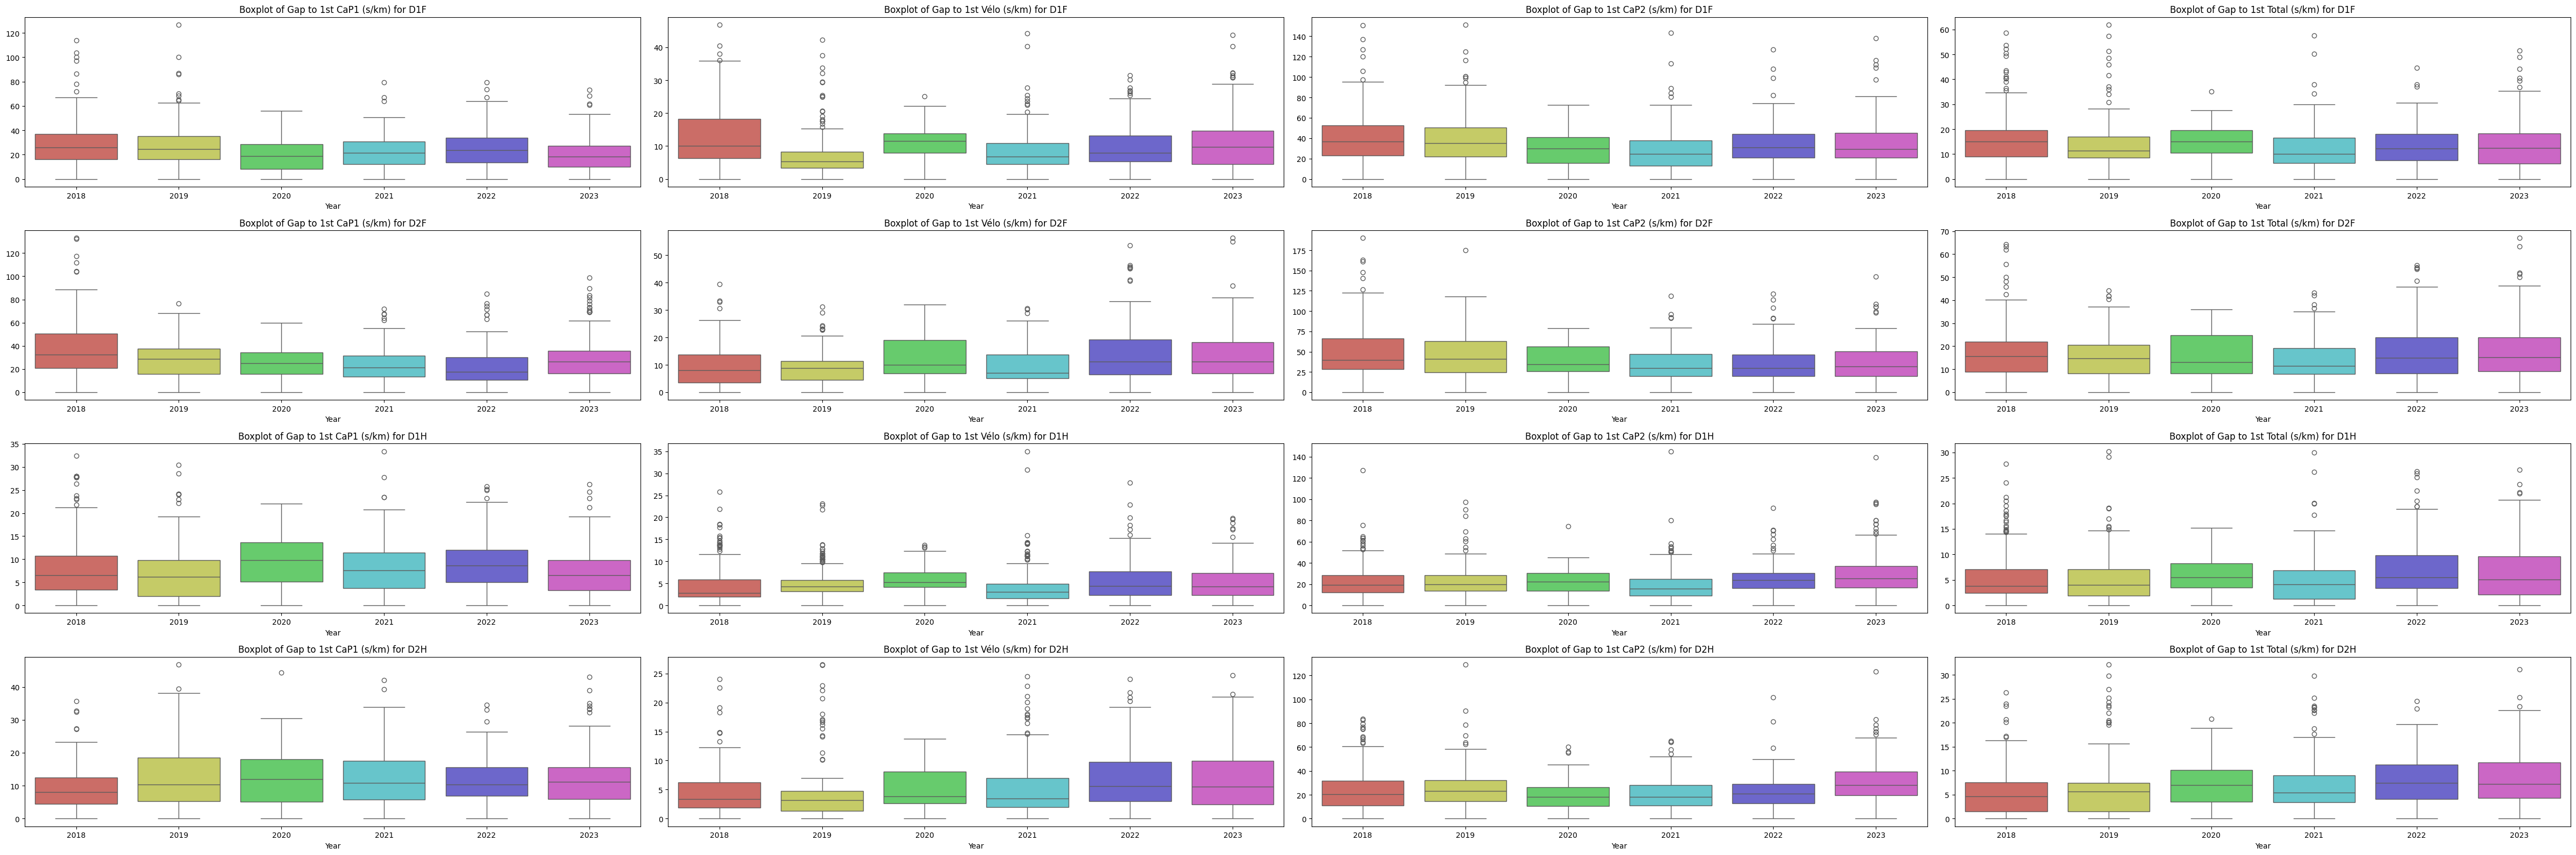

In [8]:
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique races
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique race and each data column
fig, axes = plt.subplots(nrows=len(unique_races), ncols=len(data_columns), figsize=(12 * len(data_columns), 4 * len(unique_races)))

# Iterate through unique races and create boxplots
for race_idx, race in enumerate(unique_races):
    data_subset = scratch_df[scratch_df['Race'] == race]
    for col_idx, column in enumerate(data_columns):
        data_subset = data_subset.dropna(subset=[column])  # Remove rows with missing values in the current column
        sns.boxplot(x='year', y=column, data=data_subset, ax=axes[race_idx][col_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[race_idx][col_idx].set_title(f'Boxplot of {column} for {race}')
        axes[race_idx][col_idx].set_xlabel('Year')
        axes[race_idx][col_idx].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


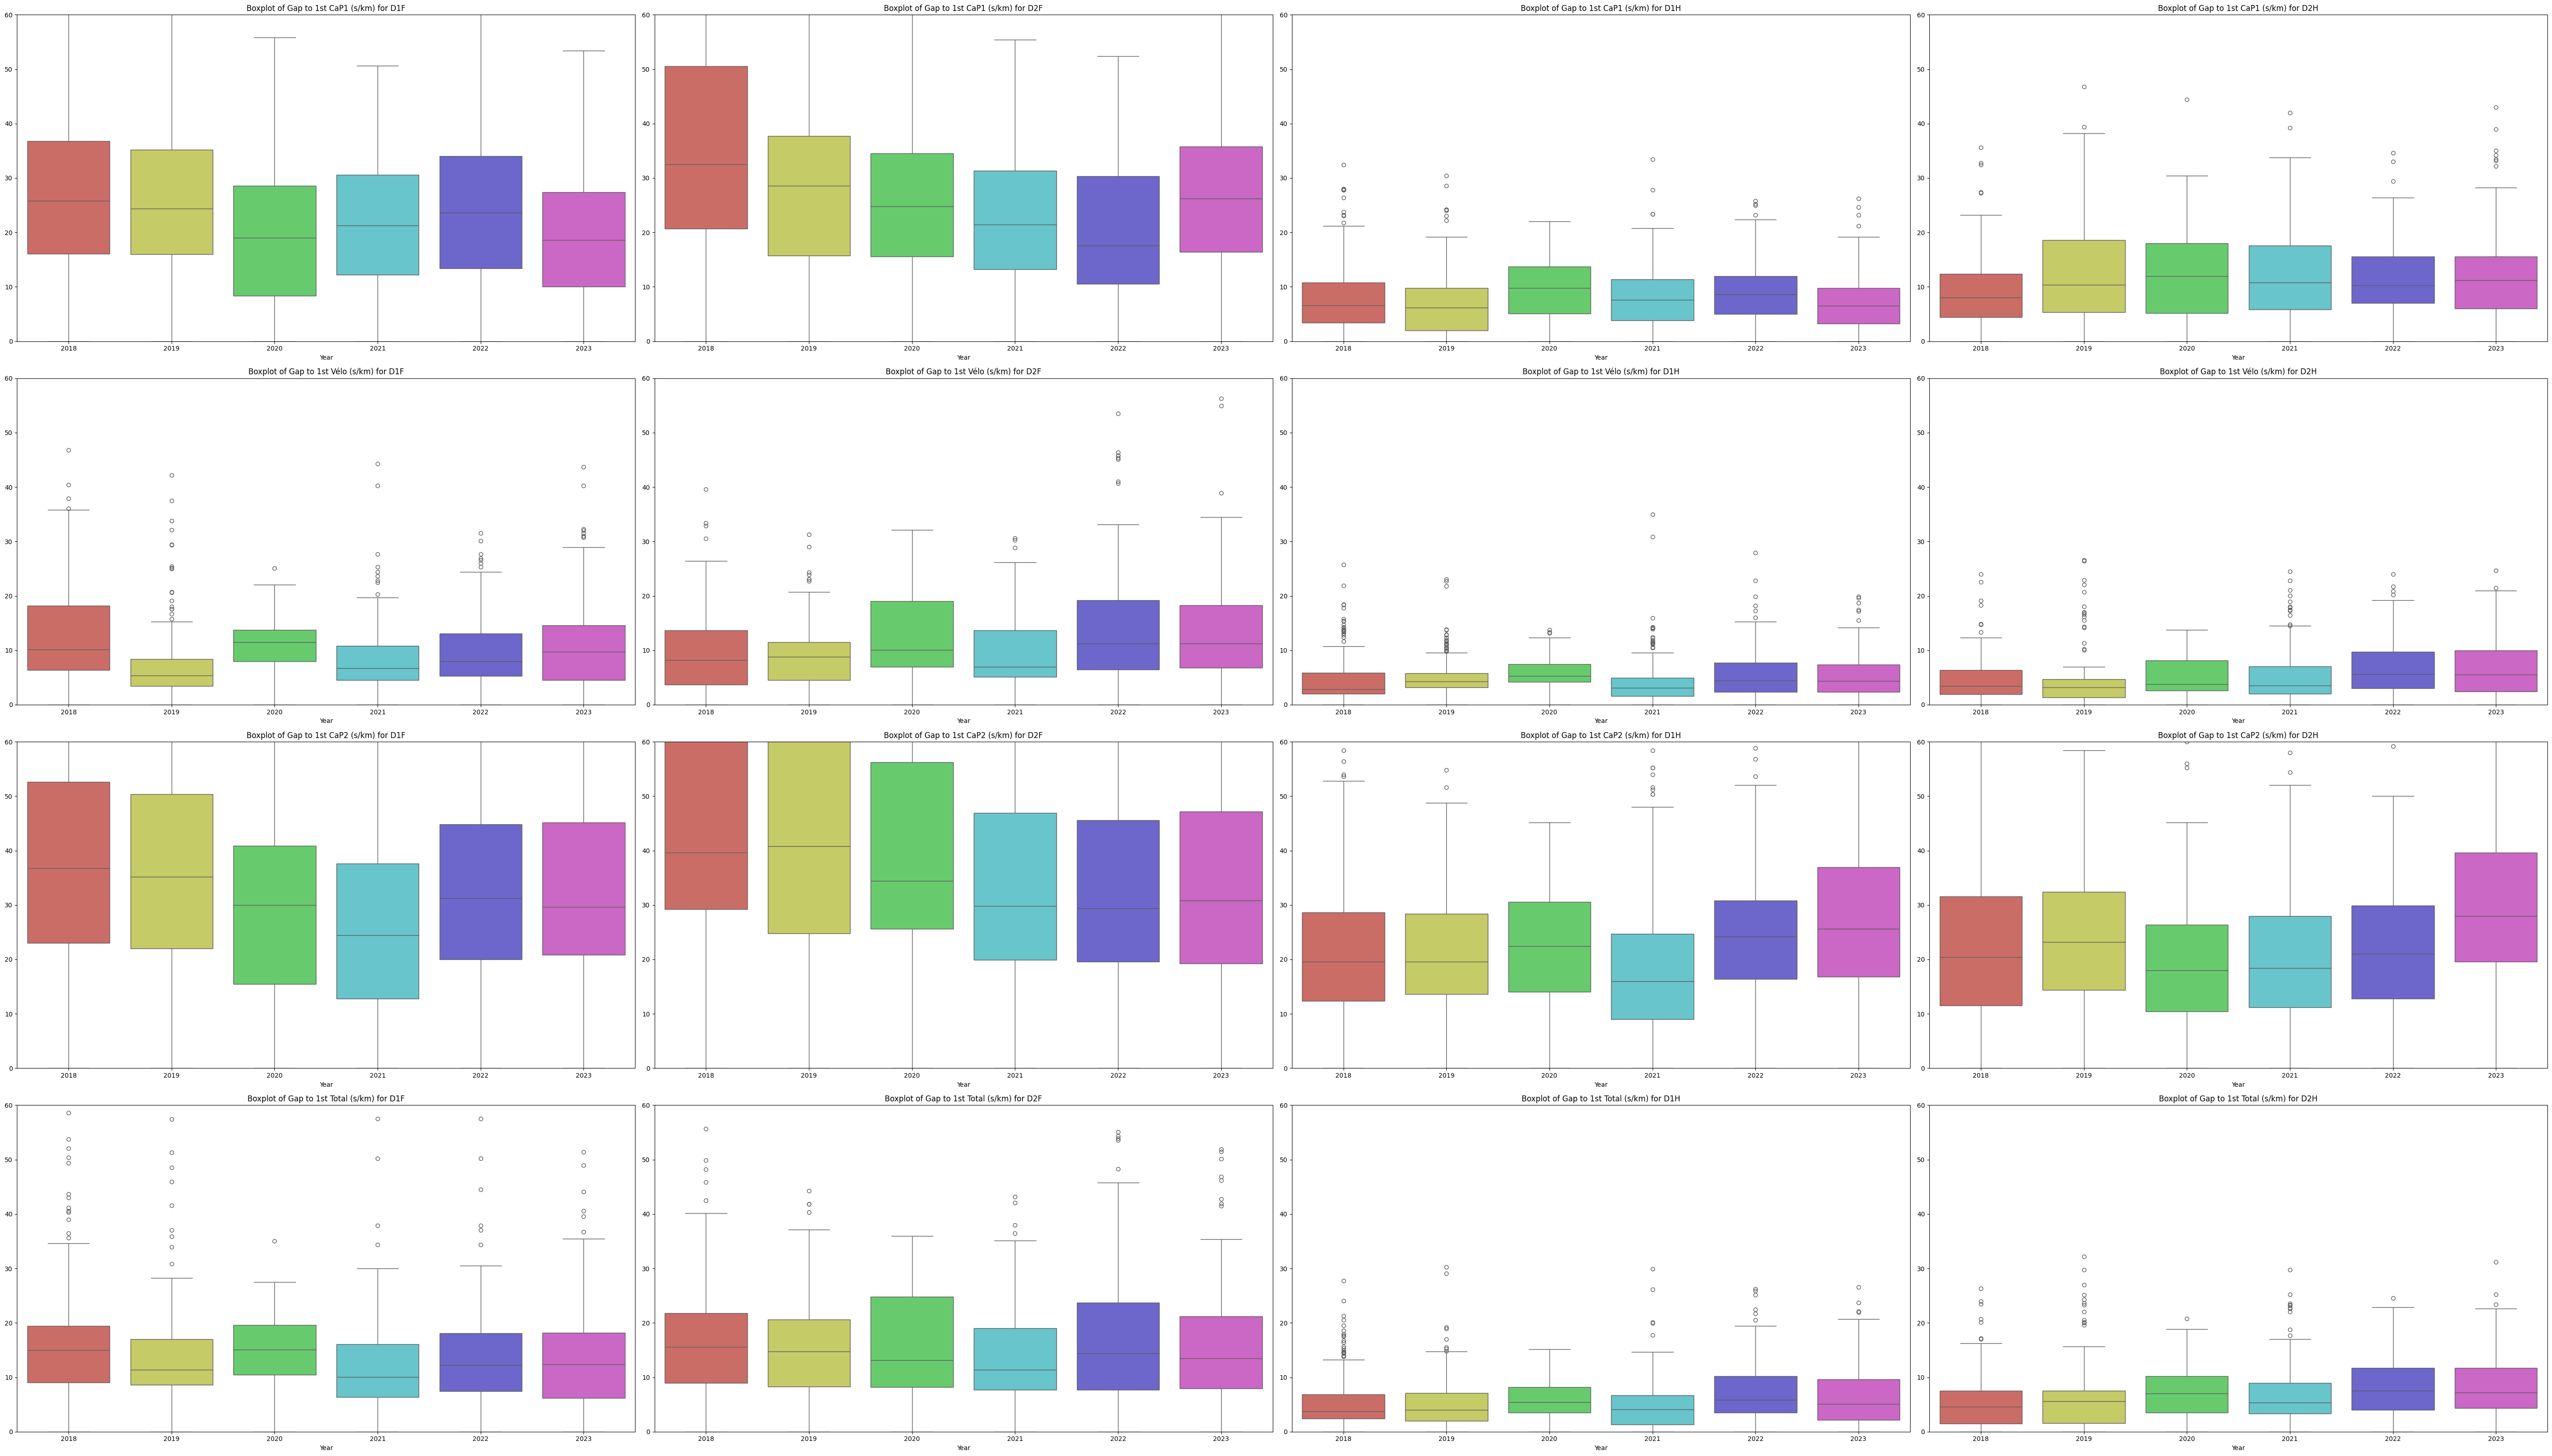

In [9]:
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique races
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique data column and each race
fig, axes = plt.subplots(nrows=len(data_columns), ncols=len(unique_races), figsize=(14 * len(unique_races), 8 * len(data_columns)))

# Iterate through unique data columns and create boxplots
for col_idx, column in enumerate(data_columns):
    for race_idx, race in enumerate(unique_races):
        data_subset = scratch_df[(scratch_df['Race'] == race) & (~scratch_df[column].isnull())]
        sns.boxplot(x='year', y=column, data=data_subset, ax=axes[col_idx][race_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[col_idx][race_idx].set_title(f'Boxplot of {column} for {race}')
        axes[col_idx][race_idx].set_xlabel('Year')
        axes[col_idx][race_idx].set_ylabel('')
        # Set the y-axis limits for each subplot
        axes[col_idx][race_idx].set_ylim(0, 60)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


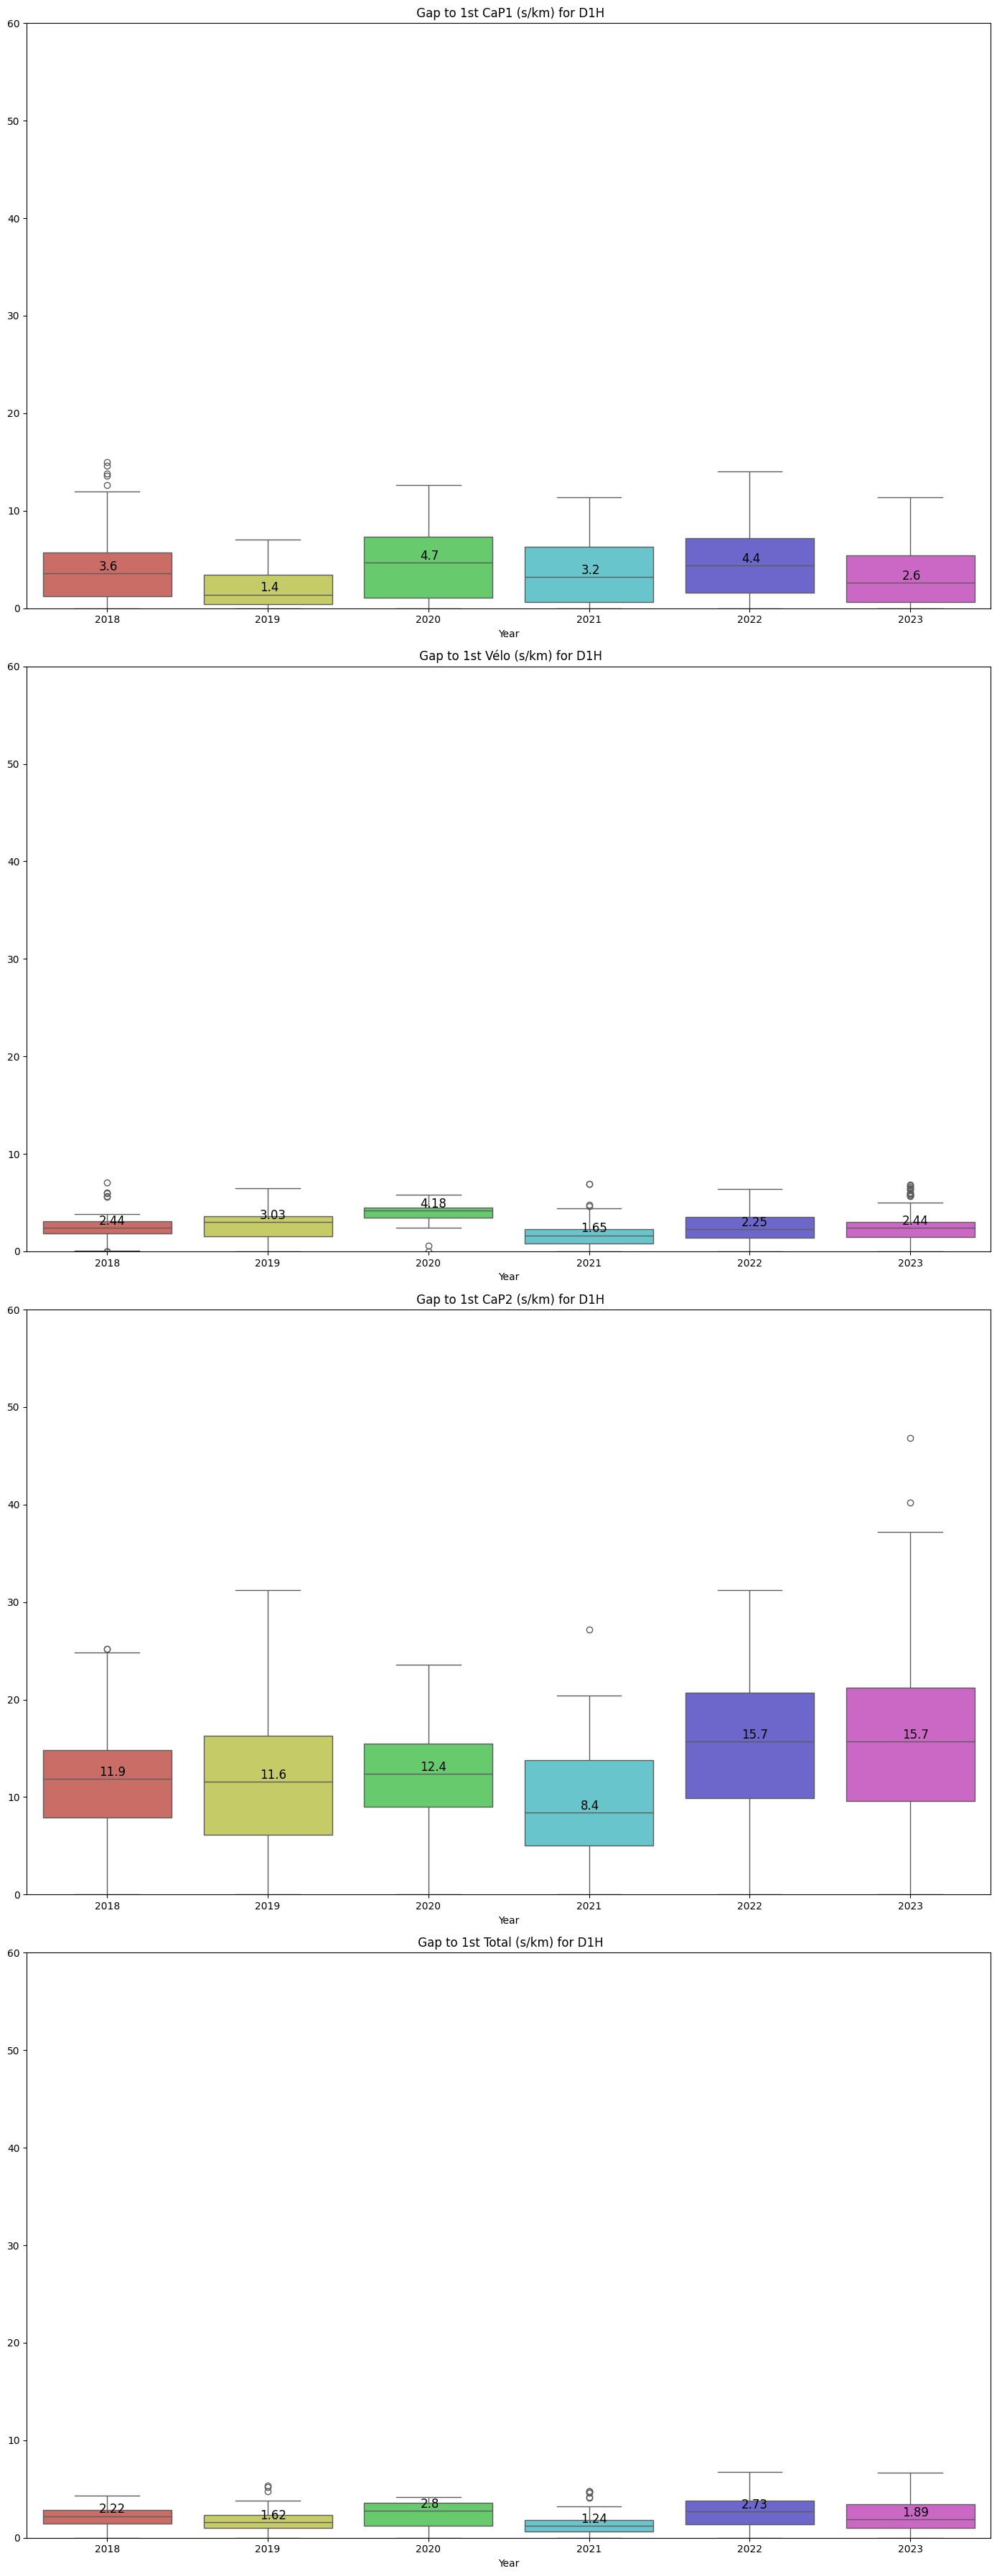

In [10]:
# Plot for the analysis of the D1H

# Define the race you want to plot
race_to_plot = "D1H"
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Create subplots for each unique data column
fig, axes = plt.subplots(nrows=len(data_columns), ncols=1, figsize=(14, 36))

# Iterate through unique data columns and create boxplots
for col_idx, column in enumerate(data_columns):
    data_subset = df_D1H[(df_D1H['Race'] == race_to_plot) & (~df_D1H[column].isnull())]
    box = sns.boxplot(x='year', y=column, data=data_subset, ax=axes[col_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
    axes[col_idx].set_title(f' {column} for {race_to_plot}')
    axes[col_idx].set_xlabel('Year')
    axes[col_idx].set_ylabel('')
    # Set the y-axis limits for each subplot
    axes[col_idx].set_ylim(0, 40)

    
    # Add median, 1st quartile, and 3rd quartile annotations for each year in hue
    for i, year in enumerate([2018, 2019, 2020, 2021, 2022, 2023]):
        year_data = data_subset[data_subset['year'] == year]
        median = year_data[column].median()
        q1 = year_data[column].quantile(0.25)
        q3 = year_data[column].quantile(0.75)
        
        # Calculate the position for annotation based on box width
        posx = i - 0.05
        
        # Add annotations above the boxes
        box.text(posx, median + 0.3, str(round(median, 2)),fontsize = 12)
        #box.text(posx - 0.1, q1 - 1, str(round(q1, 2)),fontsize = 14)
        #box.text(posx + 0.1, q3 + 0.4, str(round(q3, 2)),fontsize = 14)
        #box.annotate(round(q1, 2), xy=(posx, q1), va='center', ha='center')
        #box.annotate(round(q3, 2), xy=(posx, q3), va='center', ha='center')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


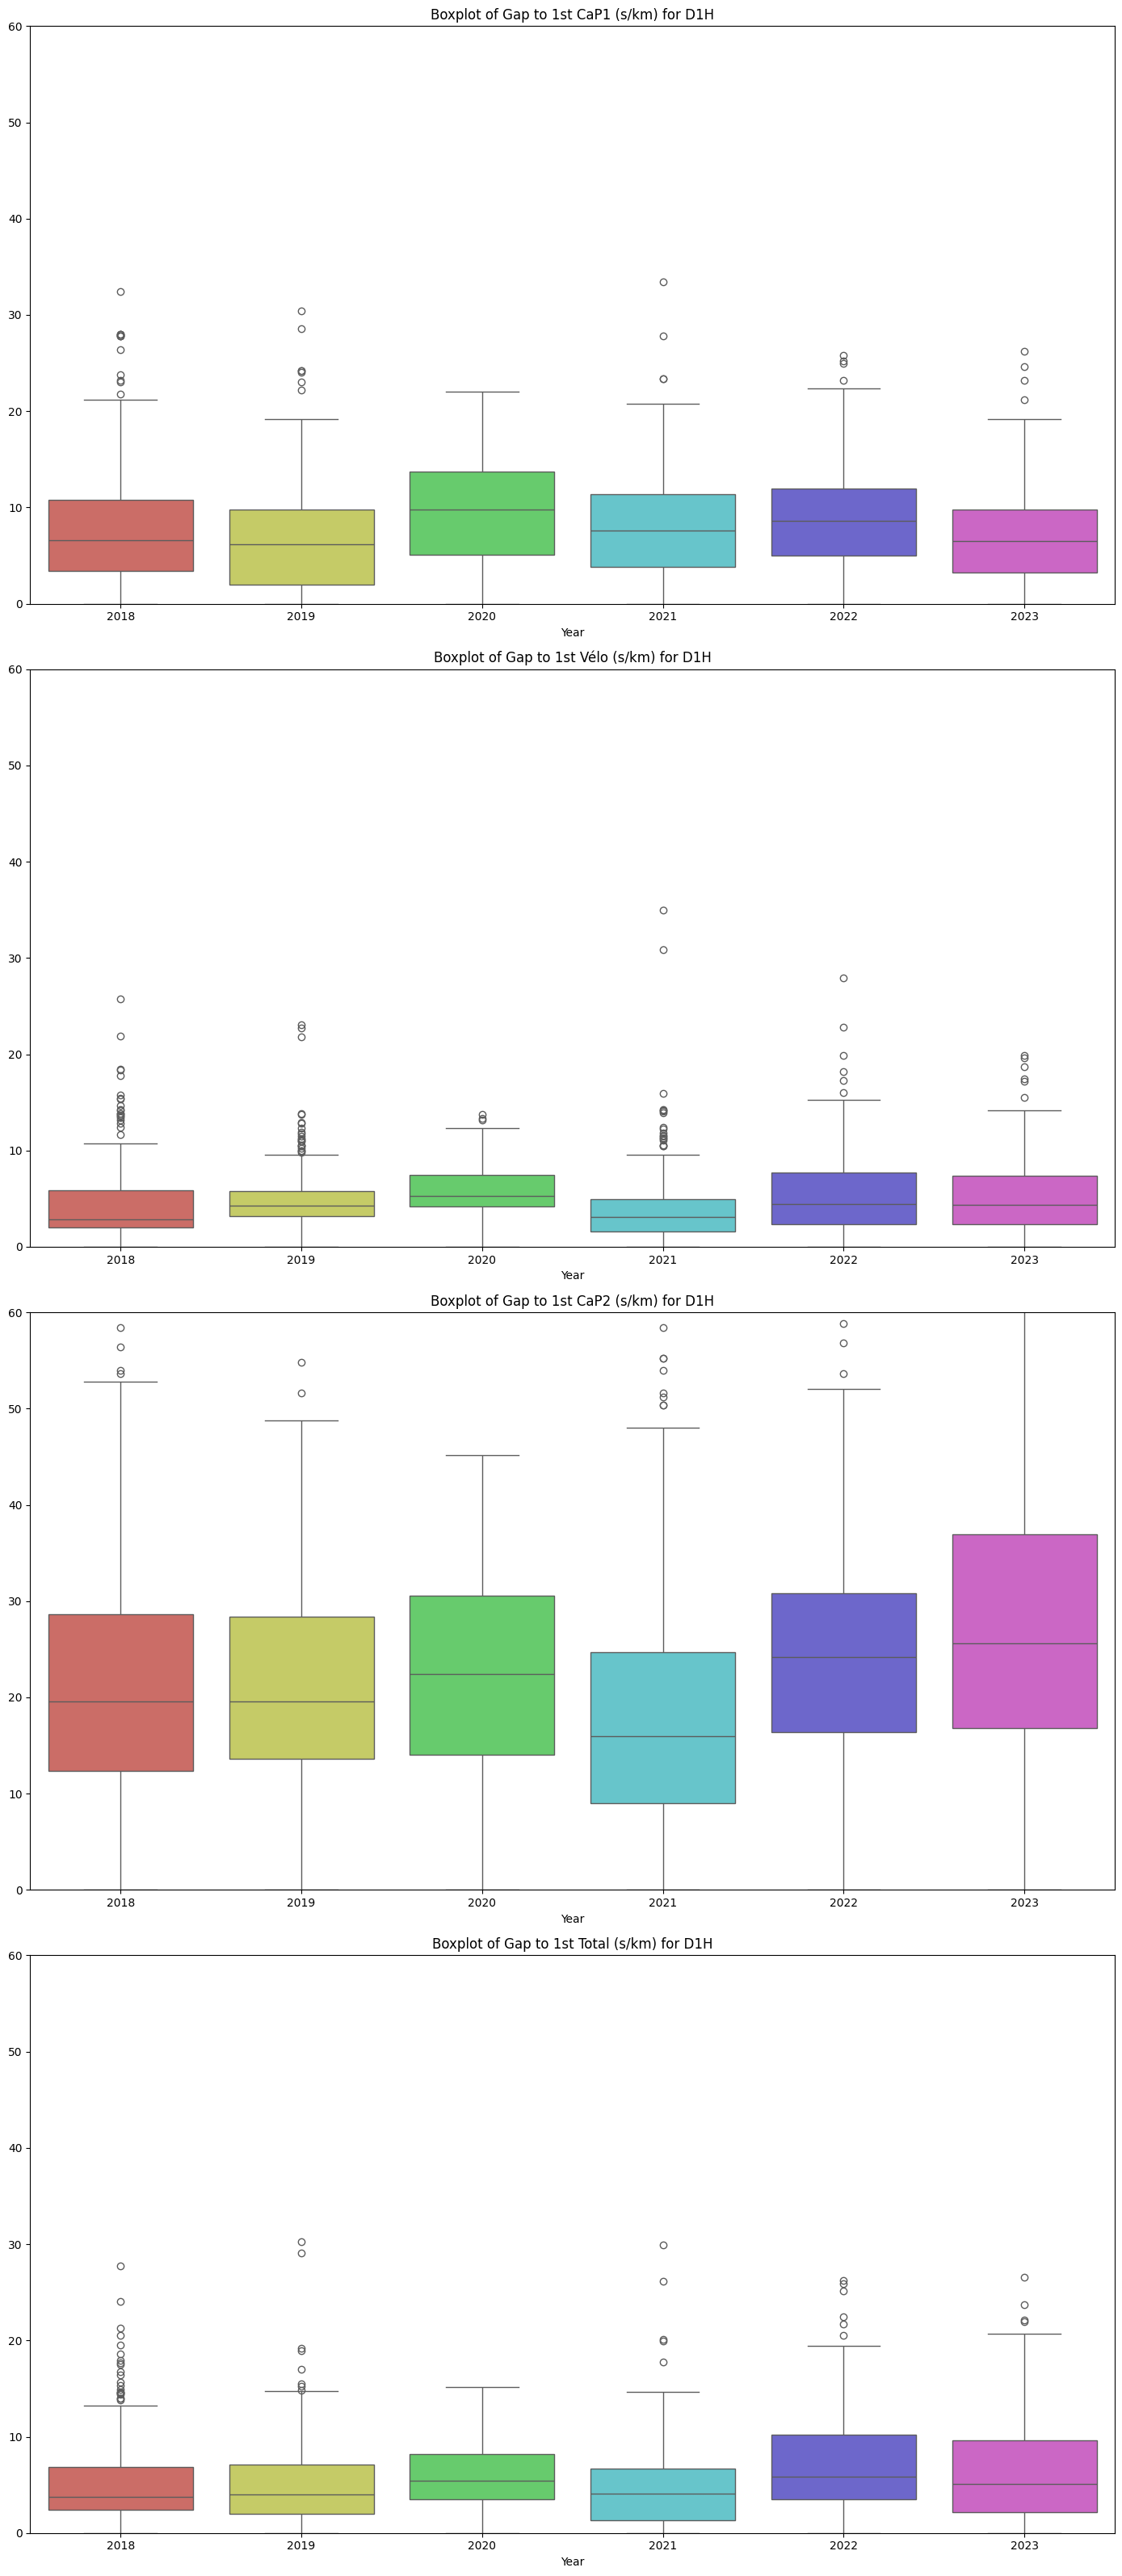

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the race you want to plot
race_to_plot = "D1H"
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Create subplots for each unique data column
fig, axes = plt.subplots(nrows=len(data_columns), ncols=1, figsize=(14, 8 * len(data_columns)))

# Iterate through unique data columns and create boxplots
for col_idx, column in enumerate(data_columns):
    data_subset = scratch_df[(scratch_df['Race'] == race_to_plot) & (~scratch_df[column].isnull())]
    
    
    box = sns.boxplot(x='year', y=column, data=data_subset, ax=axes[col_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
    axes[col_idx].set_title(f'Boxplot of {column} for {race_to_plot}')
    axes[col_idx].set_xlabel('Year')
    axes[col_idx].set_ylabel('')
    # Set the y-axis limits for each subplot
    axes[col_idx].set_ylim(0, 60)
    
    # Add median, 1st quartile, and 3rd quartile annotations for each year in hue
    for year in [2023, 2022, 2021, 2020, 2019, 2018]:
        year_data = data_subset[data_subset['year'] == year]
        median = year_data[column].median()
        q1 = year_data[column].quantile(0.25)
        q3 = year_data[column].quantile(0.75)
        
        # Calculate the position for annotation
        posx = year
        posy = median
        
        box.annotate(f'Median: {median:.2f}', xy=(posx, posy), xytext=(0, 20), textcoords='offset points', fontsize=12, va='center', ha='center')
        # You can add annotations for q1 and q3 in a similar manner
        
# Adjust spacing between subplots
plt.tight_layout()

plt.show()


# 1.2. Correlation based on score

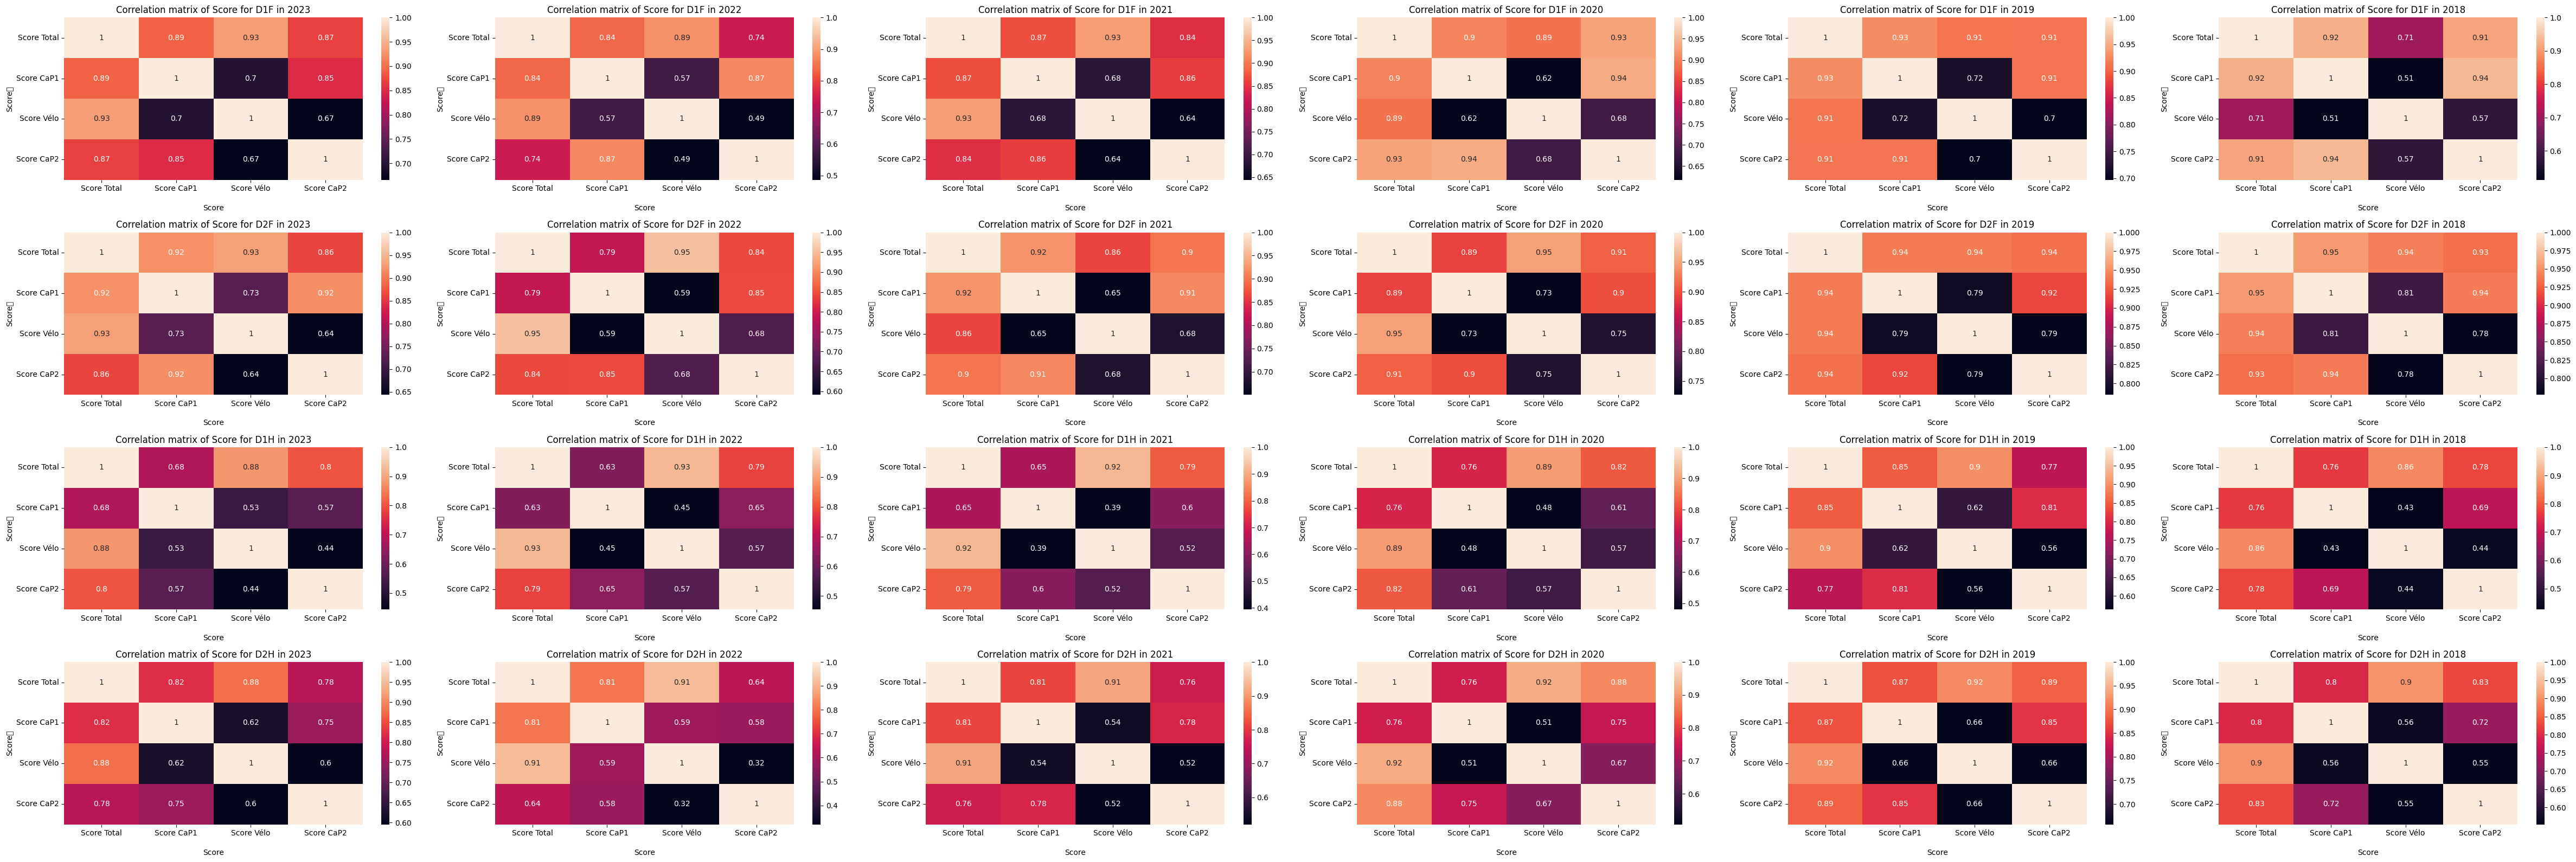

In [21]:
data_columns = ["Score Total", "Score CaP1", "Score Vélo", "Score CaP2"]

# Get unique races and years
unique_races = scratch_df['Race'].unique()
unique_years = scratch_df['year'].unique()

# Create subplots for each unique race and each data column
fig, axes = plt.subplots(nrows=len(unique_races), ncols=len(unique_years), figsize=(12 * len(data_columns), 4 * len(unique_races)))

# Iterate through unique races and create boxplots
for race_idx, race in enumerate(unique_races):
    for year_idx, year in enumerate(unique_years):
        # Use parentheses to separate the conditions correctly
        data_subset = scratch_df[(scratch_df['Race'] == race) & (scratch_df['year'] == year)][data_columns]
        corr = data_subset.corr()["Score Total"].abs().sort_values(ascending=False)
        data_subset = data_subset.dropna(subset=data_columns)  # Remove rows with missing values in the selected columns

        # Calculate the correct index for the subplot
        subplot_index = race_idx * len(unique_years) + year_idx + 1

        # Create a heatmap for the correlation matrix
        hm = sns.heatmap(data_subset.corr(), annot=True, ax=axes[race_idx, year_idx])
        hm.set(xlabel='\nScore', ylabel='Score\t', title=f"Correlation matrix of Score for {race} in {year}")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()
